# NBA Trends Project

*Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In this project, we'll analyze data from the NBA (National Basketball Association) and explore possible associations.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [3]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [4]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

### Task 1
The data has been subset into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014). To start, let’s focus on the 2010 data.

Suppose we want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, let's create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.


In [5]:
knicks_pts = nba_2010[nba_2010.fran_id=="Knicks"]
nets_pts = nba_2010[nba_2010.fran_id=="Nets"]

### Task 2

Let's calculate the difference between the two teams’ average points scored and save the result as diff_means_2010.

In [6]:
diff_means_2010 = knicks_pts.pts.mean() - nets_pts.pts.mean()
print(diff_means_2010)

9.731707317073173


In average, the Knicks team scored 10 more points than the Nets team, but we don't know yet if this difference means that the fran_id is associated to pts, we need to investigate more.

### Task 3
Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Let's Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets.

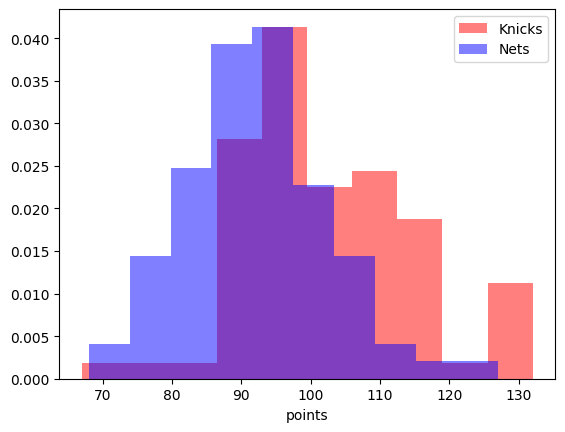

In [19]:
plt.hist(knicks_pts.pts, color = 'red', density = True, alpha = 0.5, label = 'Knicks')
plt.hist(nets_pts.pts, color = 'blue', density = True, alpha = 0.5,  label = 'Nets')
plt.legend()
plt.xlabel('points')
plt.show()

We can tell from this plot that, in 2010, the Knicks team was more likely to score more than 90 points approximately, however the Nets team was more likely to score less than 100, meaning that the difference. But both teams had the same percentage of scoring from 90 to 100 points.

### Task 4
Now, let’s compare the 2010 games to 2014.


0.44706798131809933


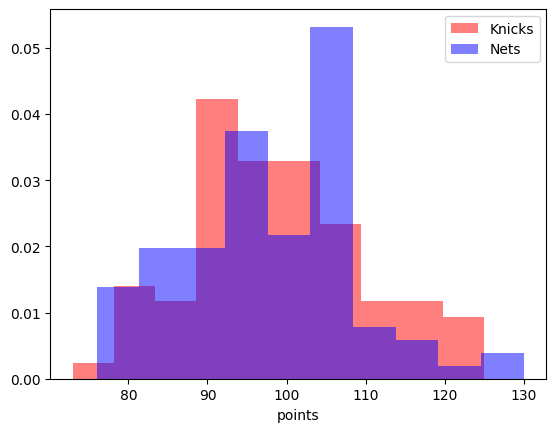

In [8]:
knicks_pts_2014 = nba_2014[nba_2014.fran_id=="Knicks"]
nets_pts_2014 = nba_2014[nba_2014.fran_id=="Nets"]

diff_means_2014 = knicks_pts_2014.pts.mean() - nets_pts_2014.pts.mean()
print(diff_means_2014)

plt.hist(knicks_pts_2014.pts, color = 'red', density = True, alpha = 0.5, label = 'Knicks')
plt.hist(nets_pts_2014.pts, color = 'blue', density = True, alpha = 0.5,  label = 'Nets')
plt.legend()
plt.xlabel('points')
plt.show()

It appears that, in 2014, the two teams are having quiet similar performance in the points scored, the mean difference had moved from 10 in 2010 to 0.44 which makes it very unsignificant, and therefore the association between the points and the team variable became less remarkable.

### Task 5
For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

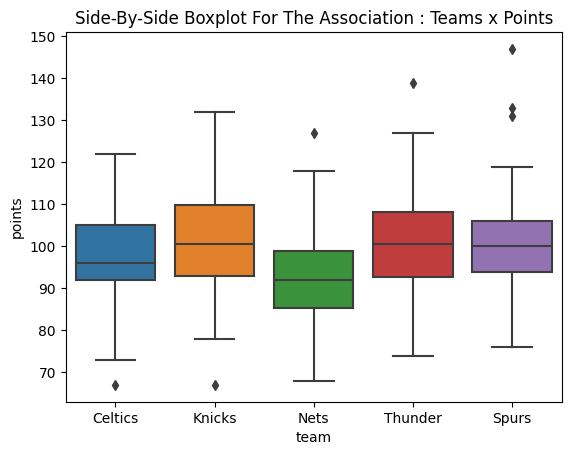

In [9]:
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.title("Side-By-Side Boxplot For The Association : Teams x Points")
plt.xlabel('team')

plt.ylabel('points')
plt.show()

This chart tells us that the difference between any pair of Celtics, Thunder and Spurs isn't significant if we don't consider outliers, and it adds up that the Nets team happened to be the least performant, while the Knicks is the most performant, because most of its points scored per game were higher than the other teams.

### Task 6
We'd like to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

Let's Calculate a table of frequencies that shows the counts of game_result and game_location.

In [10]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


### Task 7

Let's convert this table of frequencies to a table of proportions.

In [11]:
location_result_proportions = location_result_freq / len(nba_2010)
print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


### Task 8
Using the contingency table created above (Task 6), let's calculate the expected contingency table (if there were no association) and the Chi-Square statistic.


In [12]:
chi2, pvalue, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


*For a 2x2 table, Chi-squared greater than about 4 indicates an association. We exceeded that !

### Task 9

For each game, the probability that each team will win the game has been calculated. We want to know if teams with a higher probability of winning also tend to win games by more points. 

In the data, predictions are saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost).

In [13]:
point_diff_forecast_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_cov)

[[  0.05   1.37]
 [  1.37 186.56]]


### Task 10

Because the forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

In [14]:
point_diff_forecast_corr, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

0.4402088708468082


If we could consider the existence of a linear relationship, it has to be weak.

### Task 11

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

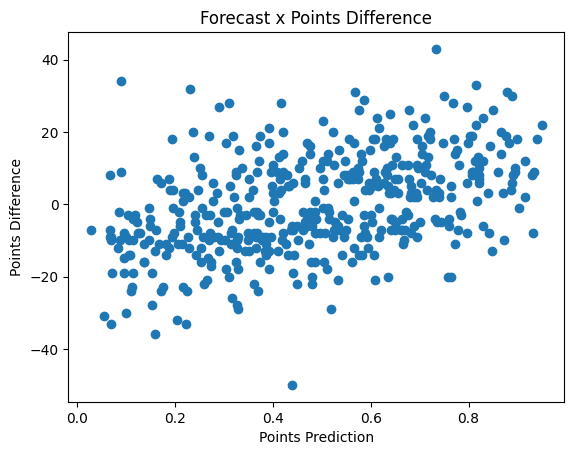

In [15]:
plt.scatter(x = nba_2010.forecast, y = nba_2010.point_diff)
plt.xlabel('Points Prediction')
plt.ylabel('Points Difference')
plt.title('Forecast x Points Difference')
plt.show()